# Task 1

In [3]:
import pandas as pd
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import math
import utils

# Comparison

In [2]:
def our_implementation(img: np.ndarray):
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)
    # plt.imshow(img)
    # plt.show()
    hough_lines = utils.hough_lines(edges, theta_res= 1.667, threshold=80, rho_res=1)
    counter = 0
    thresh = 0 
    
    while len(hough_lines) < 4 or len(hough_lines) > 5:
        #print(len(hough_lines))
        if counter == 100: break
        counter += 1
        if len(hough_lines) > 5:
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 80+thresh, theta_res= 1.667, rho_res=1)
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 80+thresh, theta_res= 1.667, rho_res=1)
    
    #print(len(hough_lines))

    line_angles = []
    for rho, theta in hough_lines:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi

        line_angles.append(theta)

        #continue
    #print(line_angles)
    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")
        #continue

    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    return angle_between_lines

    

In [19]:
def opencv_implementation(img: np.ndarray):
    img_edges = cv2.Canny(img, 40, 70, apertureSize=3)
    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(1.667), threshold=80, lines=None, srn=0, stn=0)
    
    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        #print(f"Skipping {filename} - need at least 2 lines")
        return None
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))
    
    return angle_between_lines

In [20]:
dataset = pd.read_csv("Task1Dataset\\list.txt")
our_total_error = 0
open_cv_total_error = 0
for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    our_pred = our_implementation(img) 
    opencv_pred = opencv_implementation(img)

    our_pred = our_pred if our_pred is not None else 0.0
    opencv_pred = opencv_pred if opencv_pred is not None else 0.0
    
    print(f"Our Prediction: {our_pred} -- OpenCV Prediction: {opencv_pred} -- Correct_answer: {correct_answer} -- Errors(us - cv): {np.abs(correct_answer-our_pred)} - {np.abs(correct_answer-opencv_pred)}")
    our_total_error += np.abs(correct_answer-our_pred)
    open_cv_total_error += np.abs(correct_answer-opencv_pred)

print(f"Our Total Error: {our_total_error} -- OpenCV Total Error: {open_cv_total_error}")

Our Prediction: 40.0 -- OpenCV Prediction: 0.0 -- Correct_answer: 40 -- Errors(us - cv): 0.0 - 40.0
Our Prediction: 20.0 -- OpenCV Prediction: 22.0 -- Correct_answer: 20 -- Errors(us - cv): 0.0 - 2.0
Our Prediction: 60.0 -- OpenCV Prediction: 60.0 -- Correct_answer: 60 -- Errors(us - cv): 0.0 - 0.0
Our Prediction: 120.0 -- OpenCV Prediction: 0.0 -- Correct_answer: 120 -- Errors(us - cv): 0.0 - 120.0
Our Prediction: 53.0 -- OpenCV Prediction: 0.0 -- Correct_answer: 53 -- Errors(us - cv): 0.0 - 53.0
Our Prediction: 72.0 -- OpenCV Prediction: 72.0 -- Correct_answer: 72 -- Errors(us - cv): 0.0 - 0.0
Our Prediction: 95.0 -- OpenCV Prediction: 94.0 -- Correct_answer: 95 -- Errors(us - cv): 0.0 - 1.0
Our Prediction: 108.0 -- OpenCV Prediction: 107.0 -- Correct_answer: 109 -- Errors(us - cv): 1.0 - 2.0
Our Prediction: 18.0 -- OpenCV Prediction: 19.0 -- Correct_answer: 18 -- Errors(us - cv): 0.0 - 1.0
Our Prediction: 90.0 -- OpenCV Prediction: 91.0 -- Correct_answer: 90 -- Errors(us - cv): 0.0 

In [62]:
dataset = pd.read_csv("Task1Dataset\\list.txt")
correct_counter = 0
for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    img_edges = cv2.Canny(img, 40, 70, apertureSize=3)

    
    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(1), threshold=90, lines=None, srn=0, stn=0)
    
    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping {filename} - need at least 2 lines")
        continue
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    if angle_between_lines == correct_answer:
        pass_fail_string = "PASS"
        correct_counter += 1  
    else: 
        pass_fail_string = "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

    # plt.imshow(img_edges)
    # plt.show()
print(f"Correct: {correct_counter}/{i + 1}")

theta: 40.0 -- correct_answer: 40 -- PASS
theta: 21.0 -- correct_answer: 20 -- FAIL
theta: 60.0 -- correct_answer: 60 -- PASS
theta: 120.0 -- correct_answer: 120 -- PASS
theta: 53.0 -- correct_answer: 53 -- PASS
theta: 72.0 -- correct_answer: 72 -- PASS
theta: 93.0 -- correct_answer: 95 -- FAIL
theta: 108.0 -- correct_answer: 109 -- FAIL
theta: 18.0 -- correct_answer: 18 -- PASS
theta: 1.0 -- correct_answer: 90 -- FAIL
theta: 1.0 -- correct_answer: 120 -- FAIL
Correct: 6/11


## Our Implementation

In [48]:
edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)
hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 1.668, rho_res=1)
best_hough = hough_lines
print("best_hough") if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else print("hough_lines")

best_hough


In [50]:
dataset = pd.read_csv("Task1Dataset\\list.txt")
our_total_error = 0
hough_lines = 0
thresh = 0
counter = 0
best_hough = None
for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)
    # plt.imshow(img)
    # plt.show()
    hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 1.668, rho_res=1)
    best_hough = hough_lines
    
    while len(hough_lines) < 4 or len(hough_lines) > 6:
        #print(len(hough_lines))
        if counter == 100: break
        counter += 1
        if len(hough_lines) > 6:
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    print(len(hough_lines))
    counter = 0
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

        #continue
    #print(line_angles)
    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")
        #continue

    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    print(f"Our Prediction: {angle_between_lines} -- Correct_answer: {correct_answer} -- Errors: {np.abs(correct_answer-angle_between_lines)}")
    our_total_error += np.abs(correct_answer-angle_between_lines)


print(f"Our Total Error: {our_total_error}")


4
Our Prediction: 40.0 -- Correct_answer: 40 -- Errors: 0.0
4
Our Prediction: 20.0 -- Correct_answer: 20 -- Errors: 0.0
4
Our Prediction: 60.0 -- Correct_answer: 60 -- Errors: 0.0
4
Our Prediction: 120.0 -- Correct_answer: 120 -- Errors: 0.0
4
Our Prediction: 53.0 -- Correct_answer: 53 -- Errors: 0.0
5
Our Prediction: 72.0 -- Correct_answer: 72 -- Errors: 0.0
6
Our Prediction: 95.0 -- Correct_answer: 95 -- Errors: 0.0
4
Our Prediction: 108.0 -- Correct_answer: 109 -- Errors: 1.0
4
Our Prediction: 18.0 -- Correct_answer: 18 -- Errors: 0.0
4
Our Prediction: 90.0 -- Correct_answer: 90 -- Errors: 0.0
4
Our Prediction: 120.0 -- Correct_answer: 120 -- Errors: 0.0
Our Total Error: 1.0


## Other

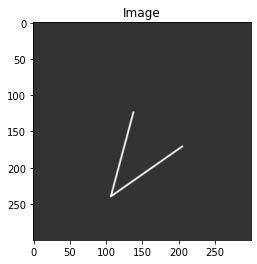

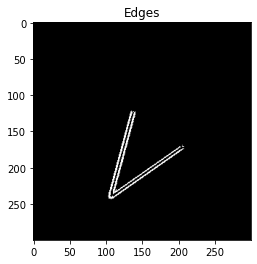

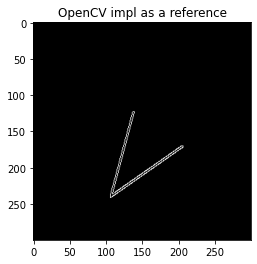

(<matplotlib.image.AxesImage at 0x1ce927564c0>,
 Text(0.5, 1.0, 'OpenCV impl as a reference'),
 None)

In [2]:
img = cv2.imread("Task1Dataset\\image1.png")
img = img[0:300, 500:800]

# img = cv2.imread("ducks.jpeg")
# img = img[1200:1800,1200:1800]

img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)), plt.title('Image'), plt.show()

img_canny = utils.canny(img, 
                  gauss_kernel_size=5, 
                  sigma=5, 
                  low_threshold=70, 
                  high_threshold=110
                  )
plt.imshow(cv2.cvtColor(img_canny, cv2.COLOR_GRAY2RGB)), plt.title('Edges'), plt.show()

img_canny_reference = cv2.Canny(img, threshold1=70, threshold2=110)
plt.imshow(cv2.cvtColor(img_canny_reference, cv2.COLOR_GRAY2RGB)), plt.title('OpenCV impl as a reference'), plt.show()

# Our Implementation Clean <br>
https://theailearner.com/tag/hysteresis-thresholding/

Initialize the accumulator (H) to all zeros 

For each edge pixel (x,y) in the image

    For Θ = 0 to 180
    
        Calculate r (r = x*cosΘ + y*sinΘ)
        
        H(Θ,r) = H(Θ,r) +1

        endFor
    
    endFor
    
Find the (Θ,r) value(s), where H(Θ,r) is above a suitable threshold value.

In [105]:
# Example usage
#img = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

img = cv2.imread("Task1Dataset\\image4.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)
#edges= utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=50, high_threshold=150)
lines = utils.hough_lines(edges, 20)
#lines = utils.get_lines(accumulator, theta_range, rho_range, threshold=100)
output_img = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
utils.draw_lines(output_img, lines)
cv2.imshow('Hough Lines', output_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

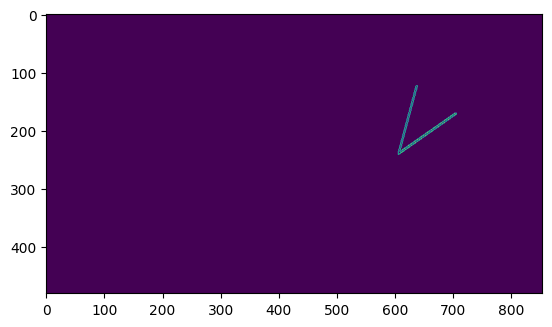

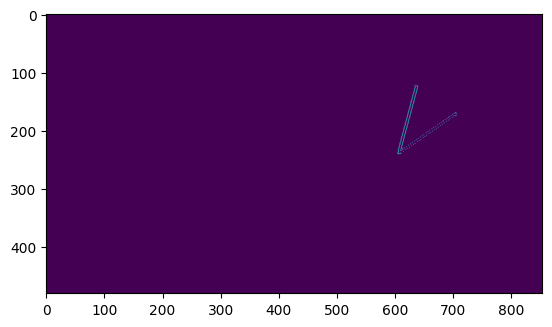

In [91]:
img = cv2.imread("Task1Dataset\\image1.png", cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 50, 150)
edges2 = utils.canny(img, gauss_kernel_size=5, sigma=2, low_threshold=10, high_threshold=15)
plt.imshow(edges)
plt.show()
plt.imshow(edges2)

<>:2: SyntaxWarning: invalid escape sequence '\i'
<>:2: SyntaxWarning: invalid escape sequence '\i'
C:\Users\giova\AppData\Local\Temp\ipykernel_27272\424936790.py:2: SyntaxWarning: invalid escape sequence '\i'
  img = cv2.imread('Task1Dataset\image7.png', cv2.IMREAD_GRAYSCALE)


[-0.8726646259971648, -0.8726646259971648, -0.8726646259971648, 0.7853981633974483, 0.7853981633974483, 0.7853981633974483]
theta: 95.0 -- correct_answer: 20 -- FAIL


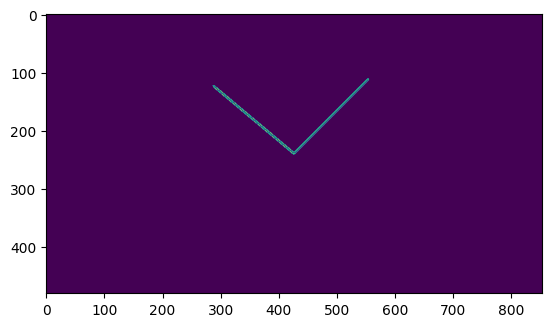

In [166]:
# Example usage
img = cv2.imread('Task1Dataset\image7.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img, 20, 40)
accumulator, theta_range, rho_range = utils.hough_transform(edges)
hough_line = utils.get_lines(accumulator, theta_range, rho_range, threshold=100)
line_angles = []
plt.imshow(edges)
plt.plot()

for rho, theta in hough_line:
    #print(line)
    #(rho, theta) = (line[0][0], line[0][1])
    # Handle whether the line is in the positive or negative x
    if (rho < 0):
        theta += np.pi

    line_angles.append(theta)

    #continue
print(line_angles)
if(len(line_angles) < 2):
    print(f"Skipping  - need at least 2 lines")
    #continue

# Calculate difference of angles and choose the smaller angle
angle1 = max(line_angles) - min(line_angles)
angle2 = (2 * np.pi) - angle1
angle_between_lines = min(angle1, angle2)
angle_between_lines = np.round(np.rad2deg(angle_between_lines))

pass_fail_string = "PASS" if angle_between_lines == 20 else "FAIL"
print(f"theta: {angle_between_lines} -- correct_answer: {20} -- {pass_fail_string}")

In [7]:
def calculate_angle(line1, line2):
    """
    Calculate angle between two lines.
    """
    angle1 = np.arctan2(line1[0][3] - line1[0][1], line1[0][2] - line1[0][0])
    angle2 = np.arctan2(line2[0][3] - line2[0][1], line2[0][2] - line2[0][0])
    angle = np.degrees(angle1 - angle2)
    return angle if angle >= 0 else angle + 180

In [27]:
dataset = pd.read_csv("Task1Dataset\\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)

    edges = utils.canny(img, gauss_kernel_size=5, sigma=30, low_threshold=110, high_threshold=200)
    # plt.imshow(img)
    # plt.show()
    accumulator, theta_range, rho_range = utils.hough_transform(edges, theta_res= np.pi/180, rho_res=1)
    hough_lines = utils.get_lines(accumulator, theta_range, rho_range, threshold=100)
    
    line_angles = []
    for rho, theta in hough_lines:
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi

        line_angles.append(theta)

        #continue
    print(line_angles)
    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")
        #continue

    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = (np.rad2deg(angle_between_lines))

    pass_fail_string = "PASS" if angle_between_lines == correct_answer else "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

[0.9691037193870387, 0.9694083368068254, 0.9697129542266121, 0.9666667800287446, 0.9669713974485313, 0.967276014868318, 0.9675806322881049, 0.9642298406704506, 0.9645344580902373, 0.9648390755100241, 0.9651436929298108, 0.9654483103495975, 0.9617929013121566, 0.9620975187319433, 0.9624021361517301, 0.9627067535715168, 0.9630113709913035, 0.9724545110046928, 0.9596605793736493, 0.9599651967934361, 0.9602698142132228, 0.9605744316330096, 0.9608790490527963, 0.9694083368068254, 0.9697129542266121, 0.9700175716463989, 0.9703221890661856, 0.9572236400153553, 0.957528257435142, 0.9578328748549287, 0.9581374922747156, 0.9584421096945023, 0.9669713974485313, 0.967276014868318, 0.9675806322881049, 0.9678852497078916, 0.9681898671276783, 0.9547867006570613, 0.955091318076848, 0.9553959354966348, 0.9557005529164215, 0.9560051703362082, 0.9645344580902373, 0.9648390755100241, 0.9651436929298108, 0.9654483103495975, 0.9657529277693844, 0.952654378718554, 0.9529589961383408, 0.9532636135581275, 0.96

# Test Canny Here

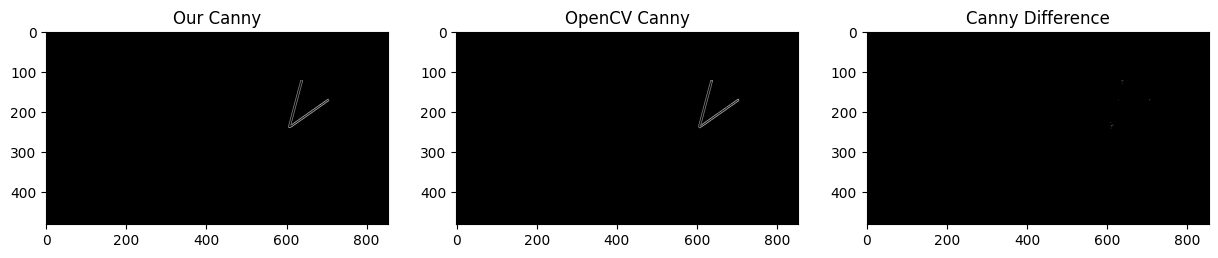

3838


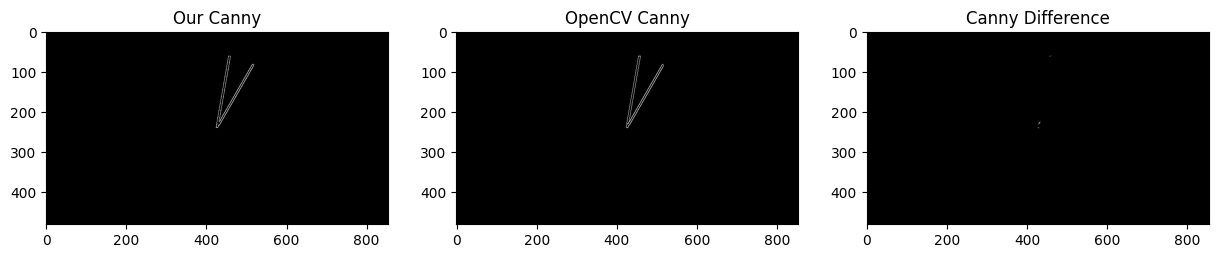

4622


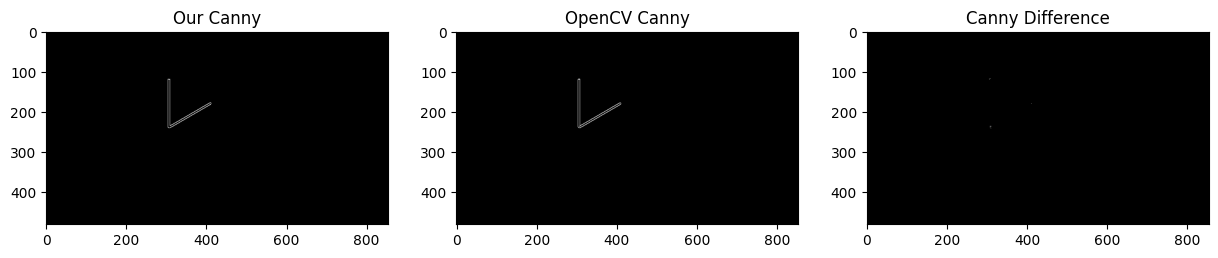

2557


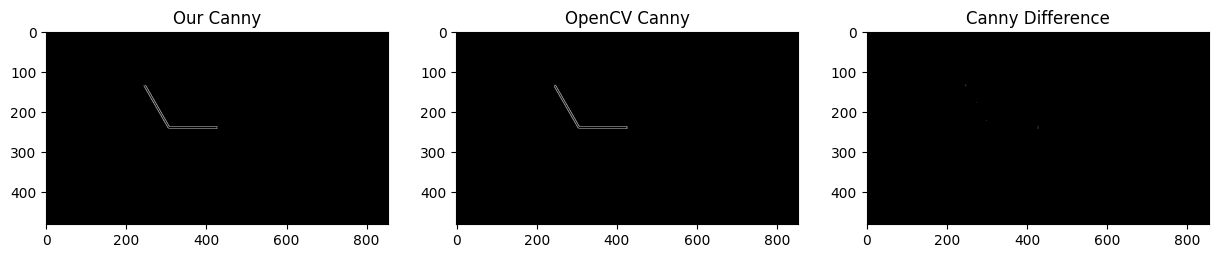

2303


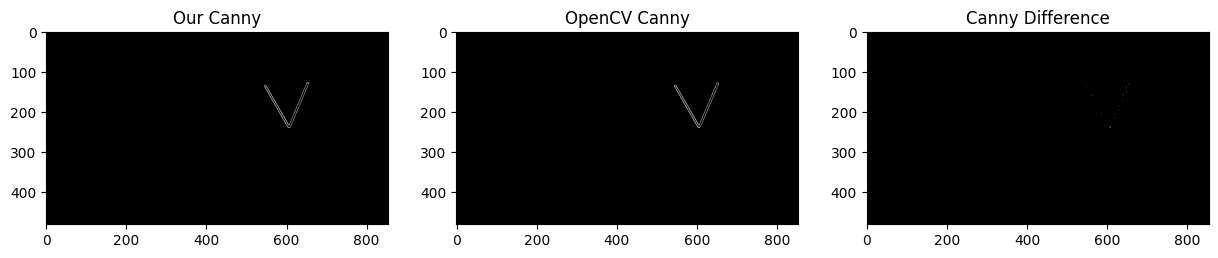

5367


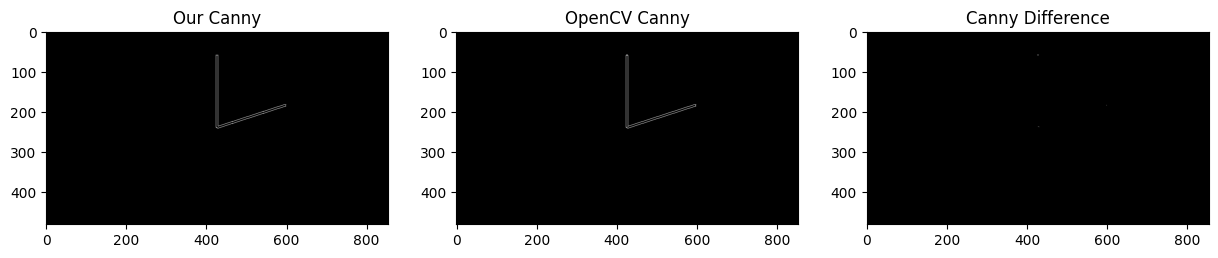

1791


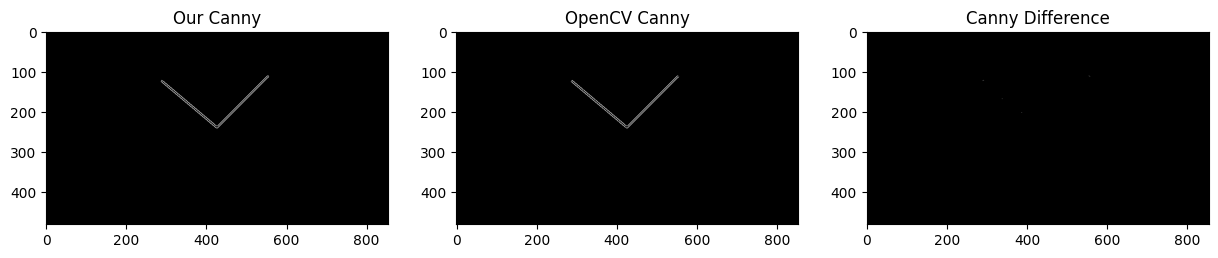

1548


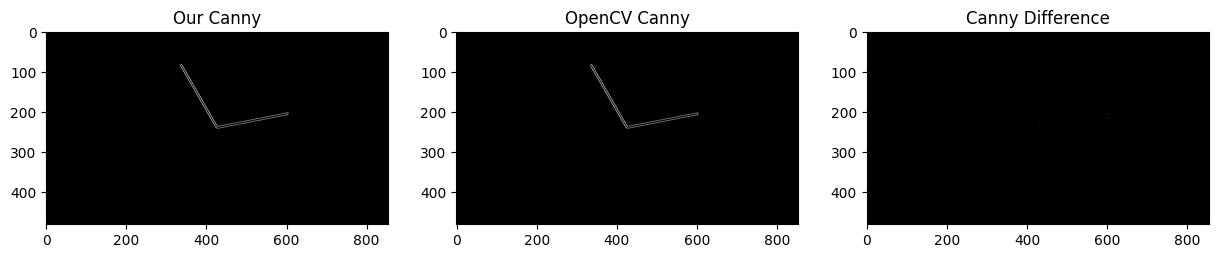

775


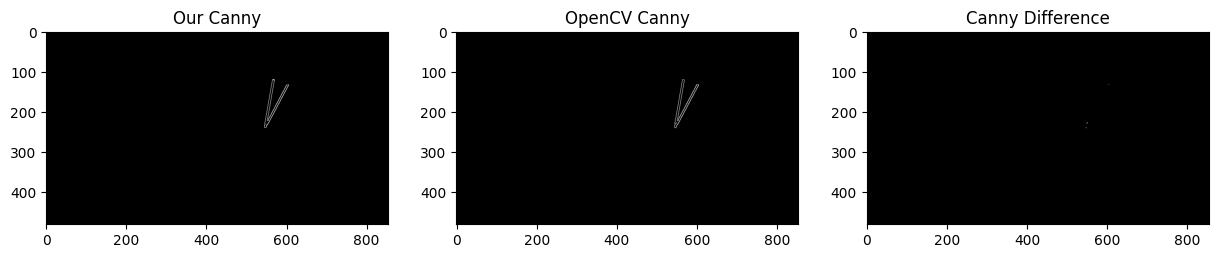

2560


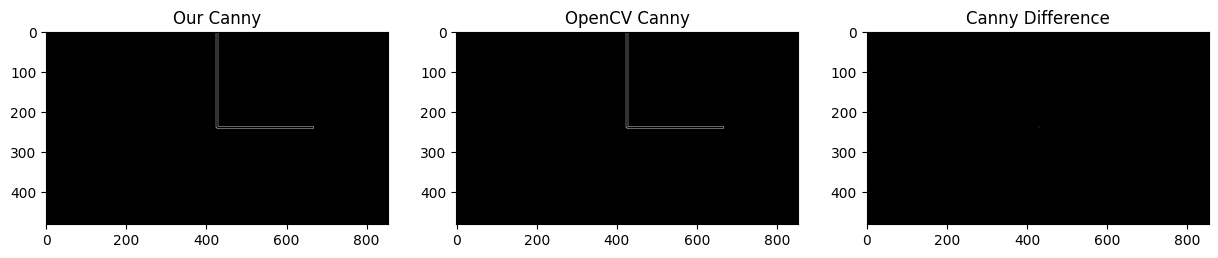

1020


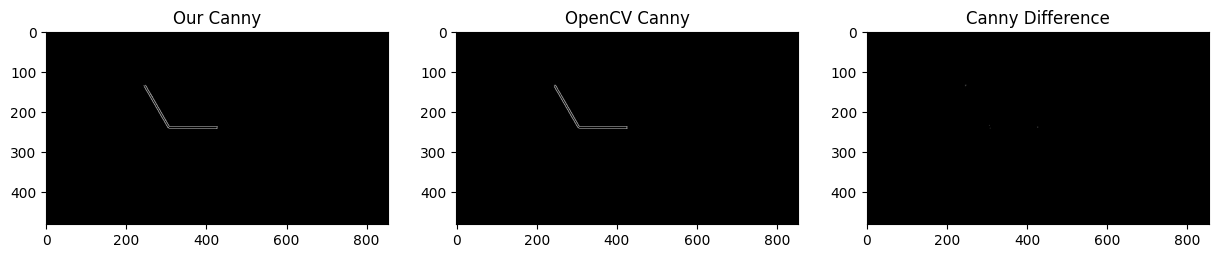

1797


In [34]:
#images = []
#answers = []
dataset = pd.read_csv("Task1Dataset\\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)
    img_blur = cv2.GaussianBlur(img, (5,5), 35)
    edges = utils.canny(img, gauss_kernel_size=5, sigma=35, low_threshold=50, high_threshold=150)
    inbuilt_canny = cv2.Canny(img_blur, threshold1=50, threshold2=150)
    
    #plt.imshow(inbuilt_canny-edges)
    plt.figure(figsize=(15, 50))
    plt.subplot(131),plt.imshow(cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)), plt.title('Our Canny')
    plt.subplot(132),plt.imshow(cv2.cvtColor(inbuilt_canny, cv2.COLOR_GRAY2RGB)), plt.title('OpenCV Canny')
    plt.subplot(133),plt.imshow(cv2.cvtColor((inbuilt_canny-edges), cv2.COLOR_GRAY2RGB)), plt.title('Canny Difference')
    plt.show()
    print(np.sum(np.abs(inbuilt_canny-edges)))
    # images.append(edges)
    # answers.append(correct_answer)

# Test params here in for loop

In [2]:
images = []
answers = []
dataset = pd.read_csv("Task1Dataset\list.txt")

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees
    img = cv2.imread(f"Task1Dataset\{filename}", cv2.IMREAD_GRAYSCALE)
    edges = utils.canny(img, gauss_kernel_size=5, sigma=20, low_threshold=20, high_threshold=40)
    images.append(edges)
    answers.append(correct_answer)

In [ ]:
thresholds = np.arange(0, 30, 1)
thetas = np.arange(0, 10, 0.1)
rhos =np.arange(0, 1, 0.01)
num_failed = np.zeros((100, 30, 100))
angle_fail = np.zeros((100, 30, 100, 10))
good_params = []
for m in rhos:
    for k in thresholds:
        for j in thetas:
            for i in range(10):
                accumulator, theta_range, rho_range = utils.hough_transform(images[i], theta_res = j + 0.1, rho_res = m + 0.01)
                hough_lines = utils.get_lines(accumulator, theta_range, rho_range, threshold = 80 + k)
                
                line_angles = []
                for rho, theta in hough_lines:
                    # Handle whether the line is in the positive or negative x
                    if (rho < 0):
                        theta += np.pi

                    line_angles.append(theta)

                if(len(line_angles) < 2):
                    num_failed[k][int(j*2)] += 1
                    angle_fail[k][int(j*2)][i] = np.inf
                    continue

                # Calculate difference of angles and choose the smaller angle
                angle1 = max(line_angles) - min(line_angles)
                angle2 = (2 * np.pi) - angle1
                angle_between_lines = min(angle1, angle2)
                angle_between_lines = np.round(np.rad2deg(angle_between_lines))

                if angle_between_lines != answers[i]:
                    num_failed[int(m*100)][k][int(j*10)] += 1
                    angle_fail[int(m*100)][k][int(j*10)][i] = abs(angle_between_lines - answers[i])

        if num_failed[int(m*100)][k][int(j*10)] == 0:
            good_params.append(m, k+80, j+0.1)
    
            #print(i)   
            # print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

: 

: 

In [5]:
good_params

[]

In [7]:
num_failed

array([[10., 10., 10., ...,  9.,  7.,  5.],
       [10., 10., 10., ...,  8.,  7.,  5.],
       [10., 10., 10., ...,  8.,  7.,  5.],
       ...,
       [10., 10., 10., ...,  6.,  7.,  5.],
       [10., 10., 10., ...,  6.,  7.,  5.],
       [10., 10., 10., ...,  6.,  7.,  5.]])

In [17]:
np.sum(angle_fail, 2)

array([[69., 70., 59., ...,  0.,  0.,  0.],
       [66., 59., 59., ...,  0.,  0.,  0.],
       [64., 51., 55., ...,  0.,  0.,  0.],
       ...,
       [32., 33., 25., ...,  0.,  0.,  0.],
       [31., 31., 25., ...,  0.,  0.,  0.],
       [31., 30., 23., ...,  0.,  0.,  0.]])

## How to task1 <br>
1. Preprocess: turn image to grayscale
2. Edge detection (Canny) <b>NOT</b> using inbuilt function
3. Line detection (Hough) <b>NOT</b> using inbuilf function
4. We get the 2 equations of the lines in 2d space
5. calculate angles


In [4]:
folderName = "Task1Dataset"
dataset = pd.read_csv(folderName + "\list.txt")

# Empirically chosen thresholds for canny edge detection
lower_threshold = 0.2 * 255
upper_threshold = lower_threshold * 1.5

for (i, row) in enumerate(dataset.itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"{folderName}\\{filename}")

    # Convert to grayscale but store as colour image to keep opencv happy
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_img = cv2.cvtColor(gray_img, cv2.COLOR_GRAY2RGB)
    
    # Detect edges with Canny edge detection
    img_edges = cv2.Canny(gray_img, lower_threshold, upper_threshold)

    hough_lines = cv2.HoughLines(img_edges, rho=1, theta=np.deg2rad(5), threshold=100, lines=None, srn=0, stn=0)

    line_angles = []
    for line in hough_lines:
        (rho, theta) = (line[0][0], line[0][1])
        # Handle whether the line is in the positive or negative x
        if (rho < 0):
            theta += np.pi
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping {filename} - need at least 2 lines")
        continue
    
    # Calculate difference of angles and choose the smaller angle
    angle1 = max(line_angles) - min(line_angles)
    angle2 = (2 * np.pi) - angle1
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    pass_fail_string = "PASS" if angle_between_lines == correct_answer else "FAIL"
    print(f"theta: {angle_between_lines} -- correct_answer: {correct_answer} -- {pass_fail_string}")

    # plt.imshow(img_edges)
    # plt.show()

Skipping image1.png - need at least 2 lines
theta: 20.0 -- correct_answer: 20 -- PASS
theta: 60.0 -- correct_answer: 60 -- PASS
theta: 120.0 -- correct_answer: 120 -- PASS
theta: 0.0 -- correct_answer: 53 -- FAIL
theta: 0.0 -- correct_answer: 72 -- FAIL
theta: 95.0 -- correct_answer: 95 -- PASS
theta: 0.0 -- correct_answer: 109 -- FAIL
Skipping image9.png - need at least 2 lines
theta: 90.0 -- correct_answer: 90 -- PASS


In [5]:
dataset

,FileName,AngleInDegrees
0,image1.png,40
1,image2.png,20
2,image3.png,60
3,image4.png,120
4,image5.png,53
5,image6.png,72
6,image7.png,95
7,image8.png,109
8,image9.png,18
9,image10.png,90


In [5]:
def get_rotated_image(image:np.ndarray, angle: int)-> np.ndarray:
    
    height, width = image.shape[:2]
    
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)

    # Apply the rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
    return rotated_image

0.7853981633974483


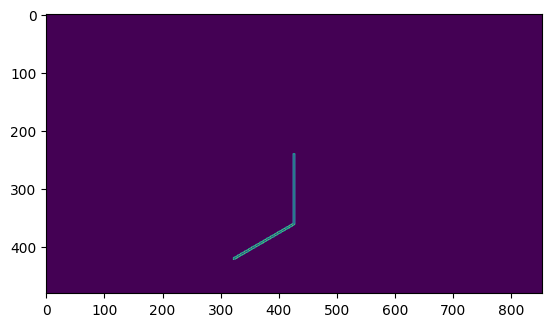

max line 59.99999999999999 | min line 0.0
angle1:  59.99999999999999 angle2:  300.0
Our Prediction: 60.0 -- Correct_answer: 120 -- Errors: 60.0


Our Total Error: 60.0


In [81]:
dataset = pd.read_csv("Task1Dataset\\list.txt") # import data

our_total_error = 0 # error counter
hough_lines = 0 # inistaite hough_lines
thresh = 0 # hough threshold
counter = 0 # initiate conuter for dynamic param assignment
best_hough = None # keep track of best hough model, initiate to None

for (i, row) in enumerate(dataset[3:4].itertuples()):
    filename, correct_answer = row.FileName, row.AngleInDegrees

    # Read in image, importantly with intensity values 0-255 not 0-1
    img = cv2.imread(f"Task1Dataset\\{filename}", cv2.IMREAD_GRAYSCALE)
    img = get_rotated_image(img, 90)
    
    #Canny Step 
    edges, magnitudes = utils.canny(img, gauss_kernel_size=3, sigma=20, low_threshold=50, high_threshold=150)
    non_zero_values = magnitudes.flatten()[magnitudes.flatten() != 0]

    # Count the occurrences of each non-zero value
    unique_values, counts = np.unique(non_zero_values, return_counts=True)
    #unique_values, counts  = np.unique([value for row in magnitudes for value in row if value != 0], return_counts= True)
    most_frequent_values = unique_values[counts == np.max(counts)]
    sorted_indices = np.argsort(counts)[::-1]
    sorted_values = unique_values[sorted_indices]
    sorted_counts = counts[sorted_indices]

    # Find the second most frequent non-zero value(s)
    second_most_frequent_values = sorted_values[1]
    print(second_most_frequent_values)
    plt.imshow(edges)
    plt.show()
    #Hough Step
    hough_lines = utils.hough_lines(edges, threshold = 90, theta_res= 5, rho_res=1)
    best_hough = hough_lines
    
    # Dynamic hyperparameter aassignment
    while len(hough_lines) < 4 or len(hough_lines) > 6:
        if counter == 100: break 
        counter += 1
        if len(hough_lines) > 6: 
            thresh += 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines
        
        else:
            thresh -= 1
            hough_lines = utils.hough_lines(edges, threshold = 90 + thresh, theta_res= 1.668, rho_res=1)
            best_hough = best_hough if np.argmin((abs(len(best_hough) - 4), abs(len(hough_lines) - 4), abs(len(best_hough) - 6), abs(len(hough_lines) - 6)))%2 ==0 else hough_lines

    
    #print(len(hough_lines))
    counter = 0
    line_angles = []
    for rho, theta in best_hough:
        # Handle whether the line is in the positive or negative x
        #theta += np.pi
        if (rho < 0):
            # print("error:", filename)
            theta += np.pi

        theta = theta % (np.pi)
        line_angles.append(theta)

    if(len(line_angles) < 2):
        print(f"Skipping  - need at least 2 lines")


    # Calculate difference of angles and choose the smaller angle
    print(f"max line {np.rad2deg(max(line_angles))} | min line {np.rad2deg(min(line_angles))}")
    
    angle1 = abs(max(line_angles) - min(line_angles))
    angle2 = (2 * np.pi) - angle1
    print("angle1: " , np.rad2deg(angle1) , "angle2: ", np.rad2deg(angle2))
    
    angle_between_lines = min(angle1, angle2)
    angle_between_lines = np.round(np.rad2deg(angle_between_lines))

    print(f"Our Prediction: {angle_between_lines} -- Correct_answer: {correct_answer} -- Errors: {np.abs(correct_answer-angle_between_lines)}")
    our_total_error += np.abs(correct_answer-angle_between_lines)
    print("\n")

print(f"Our Total Error: {our_total_error}")


In [59]:
np.rad2deg(0.7853981633974483)

45.0